In [116]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [117]:
df = pd.read_csv('data/clean_nba_stats_data.csv')


In [118]:
df.head()

,Player,TEAM,College,Country,MIN_2017,MIN_2018,AGE,Height,Weight,Draft_Number,GP,W,L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Box_Outs,OFF_Box_Outs,DEF_Box_Outs,Team_RebOn_Box_Outs,Player_RebOn_Box_Outs,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB,ContestedREB%,REBChances,REBChance%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,PotentialAST,AST_PTS_Created,ASTAdj,AST_ToPass%,AST_ToPass%_Adj,ScreenAssists,ScreenAssists_PTS,Deflections,OFF_Loose_BallsRecovered,DEF_Loose_BallsRecovered,Loose_BallsRecovered,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,ContestedShots,FGM_und_5ft,FGA_und_5ft,FG%_und_5ft,FGM_5_9ft,FGA_5_9ft,FG%_5_9ft,FGM_10_14ft,FGA_10_14ft,FG%_10_14ft,FGM_15_19ft,FGA_15_19ft,FG%_15_19ft,FGM_20_24ft,FGA_20_24ft,FG%_20_24ft,FGM_25_29ft,FGA_25_29ft,FG%_25_29ft,OPP_FGM_und_5ft,OPP_FGA_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FGA_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FGA_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FGA_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FGA_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FGA_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,REB%,eFG%,TS%,USG%,PACE,PIE
0,Aaron Gordon,ORL,Arizona,USA,32.9,33.8,22,81.0,220,4,58,19,39,17.6,6.5,14.9,43.4,2.0,5.9,33.6,2.7,3.9,69.8,1.5,6.4,7.9,2.3,1.8,1.0,0.8,1.9,34.1,17,0,-1.6,2.7,0.2,2.5,1.3,0.4,7.0,93.0,85.2,23.9,2.6,33.5,13.6,58.1,0.7,61.1,6.0,40.2,32.5,0.2,4.6,5.6,2.7,5.8,6.6,0.9,1.9,1.4,0.5,0.7,1.2,42.9,57.1,0.07,4.7,1.8,6.5,3.2,4.9,66.7,0.2,0.9,20.0,0.4,1.2,35.7,0.5,1.8,29.8,0.7,2.1,35.3,1.4,4.1,33.5,14.4,22.8,63.2,2.3,6.1,37.1,2.2,5.1,42.4,2.5,5.9,42.4,3.7,9.3,40.3,3.8,11.1,33.9,108.3,-2.0,11.1,4.4,19.1,11.6,50.0,53.0,23.8,100.43,11.3
1,Abdel Nader,BOS,Iowa State,Egypt,10.9,11.4,24,78.0,230,58,48,33,15,3.0,1.0,3.1,33.6,0.5,1.4,35.4,0.5,0.8,59.0,0.3,1.2,1.5,0.5,0.7,0.3,0.2,0.9,6.5,0,0,-2.3,0.8,0.1,0.7,0.5,0.1,17.5,82.5,92.0,12.0,0.4,29.6,2.6,57.7,0.2,62.3,7.0,8.7,9.1,0.1,1.3,1.5,0.7,6.4,8.6,0.1,0.3,0.7,0.1,0.2,0.4,38.9,61.1,0.00,1.5,1.3,2.8,0.4,1.1,40.4,0.1,0.5,20.0,0.0,0.1,20.0,0.0,0.1,0.0,0.3,0.7,38.7,0.3,0.8,32.4,4.2,7.1,59.8,0.5,1.9,26.8,0.6,1.5,41.9,0.8,1.9,42.2,1.3,3.0,43.1,1.7,4.2,39.8,107.3,-10.3,7.8,2.4,11.1,6.7,41.3,43.9,16.2,100.46,3.3
2,Al Horford,BOS,Florida,Dominican Rep...,31.6,29.0,32,82.0,245,3,72,47,25,12.9,5.1,10.5,48.9,1.3,3.1,42.9,1.3,1.7,78.3,1.4,5.9,7.4,4.7,1.8,0.6,1.1,1.9,32.0,15,0,4.8,6.8,0.5,6.3,3.5,1.3,7.3,92.7,90.4,33.3,2.5,33.9,12.7,57.8,0.6,60.6,6.4,48.9,42.9,0.3,8.0,11.7,5.1,9.5,10.4,2.7,6.5,1.3,0.4,0.4,0.8,52.6,47.4,0.00,8.8,3.5,12.3,1.9,2.9,67.5,0.8,1.9,40.7,0.5,1.4,37.3,0.4,0.9,49.2,0.5,1.2,39.5,1.0,2.2,44.1,11.5,19.2,59.8,1.8,5.4,33.9,1.8,4.9,36.0,2.4,6.6,35.7,3.4,8.3,41.2,3.5,11.8,29.8,101.6,7.3,22.5,4.7,17.8,11.5,55.3,57.5,18.3,97.23,13.4
3,Al-Farouq Aminu,POR,Wake Forest,USA,30.0,28.3,27,81.0,220,8,69,40,29,9.3,3.3,8.4,39.5,1.8,4.9,36.9,0.9,1.2,73.8,1.4,6.2,7.6,1.2,1.1,1.1,0.6,2.0,24.3,9,0,3.2,3.9,0.6,3.3,1.9,0.9,16.2,83.8,88.5,40.5,2.2,29.1,12.9,59.2,0.7,62.4,5.9,25.0,19.1,0.2,2.6,3.1,1.6,4.9,6.3,1.5,3.5,2.2,0.5,0.7,1.2,42.4,57.6,0.00,5.7,3.0,8.7,1.2,2.1,58.9,0.2,0.7,24.5,0.0,0.2,16.7,0.0,0.4,11.1,1.0,2.5,41.3,0.8,2.6,31.8,10.3,19.0,54.1,2.3,5.3,43.3,2.1,5.3,38.5,2.6,5.9,43.6,3.5,9.0,39.5,3.4,9.1,36.8,104.4,5.2,5.6,4.5,19.8,12.1,50.3,52.2,14.5,98.47,9.0
4,Alan Williams,PHX,Cal-Santa Barbara,USA,14.1,5.1,25,80.0,265,61,5,1,4,4.0,1.4,3.6,38.9,0.0,0.0,0.0,1.2,1.8,66.7,0.6,3.8,4.4,1.6,1.4,1.0,0.2,2.6,13.9,0,0,0.2,3.4,0.4,3.0,1.4,0.6,11.8,88.2,87.5,37.5,1.2,27.3,9.6,45.8,0.0,45.8,4.0,17.6,15.6,0.0,3.0,5.6,2.0,9.1,11.4,1.8,4.0,1.0,0.0,0.2,0.2,0.0,100.0,0.00,1.2,1.0,2.2,0.8,1.4,57.1,0.6,1.6,37.5,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,9.4,44.7,1.0,2.2,45.5,0.8,1.6,50.0,0.8,2.2,36.4,1.2,2.2,54.5,1.4,5.2,26.9,90.8,0.1,19.5,3.9,26.0,14.8,38.9,45.5,18.4,97.25,8.9


In [119]:
df.shape

(409, 118)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Columns: 118 entries, Player to PIE
dtypes: float64(106), int64(8), object(4)
memory usage: 377.2+ KB


In [121]:
df.isnull().sum().sum()

0

__EDA on subset of column features__

In [122]:
df_30_cols = df.iloc[:,:30]
df_30_cols.head()

,Player,TEAM,College,Country,MIN_2017,MIN_2018,AGE,Height,Weight,Draft_Number,GP,W,L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK
0,Aaron Gordon,ORL,Arizona,USA,32.9,33.8,22,81.0,220,4,58,19,39,17.6,6.5,14.9,43.4,2.0,5.9,33.6,2.7,3.9,69.8,1.5,6.4,7.9,2.3,1.8,1.0,0.8
1,Abdel Nader,BOS,Iowa State,Egypt,10.9,11.4,24,78.0,230,58,48,33,15,3.0,1.0,3.1,33.6,0.5,1.4,35.4,0.5,0.8,59.0,0.3,1.2,1.5,0.5,0.7,0.3,0.2
2,Al Horford,BOS,Florida,Dominican Rep...,31.6,29.0,32,82.0,245,3,72,47,25,12.9,5.1,10.5,48.9,1.3,3.1,42.9,1.3,1.7,78.3,1.4,5.9,7.4,4.7,1.8,0.6,1.1
3,Al-Farouq Aminu,POR,Wake Forest,USA,30.0,28.3,27,81.0,220,8,69,40,29,9.3,3.3,8.4,39.5,1.8,4.9,36.9,0.9,1.2,73.8,1.4,6.2,7.6,1.2,1.1,1.1,0.6
4,Alan Williams,PHX,Cal-Santa Barbara,USA,14.1,5.1,25,80.0,265,61,5,1,4,4.0,1.4,3.6,38.9,0.0,0.0,0.0,1.2,1.8,66.7,0.6,3.8,4.4,1.6,1.4,1.0,0.2


In [123]:
# Correlation Matrix

df_30_cols.corr()

,MIN_2017,MIN_2018,AGE,Height,Weight,Draft_Number,GP,W,L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK
MIN_2017,1.000000,0.715573,0.204298,-0.138806,-0.066020,-0.348145,0.581825,0.482013,0.454806,0.878726,0.880578,0.892542,0.048606,0.650193,0.660775,0.309825,0.701792,0.709411,0.399299,0.325612,0.654410,0.593602,0.658711,0.769441,0.721039,0.383161
MIN_2018,0.715573,1.000000,0.032202,-0.082527,-0.064472,-0.377284,0.423375,0.417007,0.258559,0.707332,0.708756,0.708201,0.087466,0.505221,0.524117,0.247057,0.575549,0.586031,0.252570,0.229502,0.501951,0.449098,0.517859,0.589995,0.546626,0.293848
AGE,0.204298,0.032202,1.000000,-0.037514,0.095039,-0.011198,0.193898,0.255762,0.047646,0.148022,0.131558,0.125638,0.052258,0.217983,0.194390,0.071132,0.106201,0.079173,0.190009,0.019651,0.117079,0.095468,0.150551,0.094726,0.089870,0.048402
Height,-0.138806,-0.082527,-0.037514,1.000000,0.799033,-0.177343,0.049964,0.017821,0.064806,-0.117359,-0.077858,-0.177488,0.292728,-0.349301,-0.359668,-0.312815,-0.060953,-0.004371,-0.180335,0.526856,0.378486,0.445336,-0.428685,-0.186103,-0.275310,0.477795
Weight,-0.066020,-0.064472,0.095039,0.799033,1.000000,-0.156972,0.107189,0.114425,0.055795,-0.024202,0.010579,-0.092248,0.325532,-0.288594,-0.303640,-0.294658,0.034977,0.093045,-0.114842,0.566448,0.435820,0.500949,-0.304266,-0.056003,-0.205776,0.459730
Draft_Number,-0.348145,-0.377284,-0.011198,-0.177343,-0.156972,1.000000,-0.279417,-0.267861,-0.178676,-0.401510,-0.419642,-0.403381,-0.089760,-0.160998,-0.178485,0.001684,-0.349872,-0.375746,-0.120335,-0.224111,-0.347876,-0.331850,-0.238304,-0.352372,-0.276139,-0.260488
GP,0.581825,0.423375,0.193898,0.049964,0.107189,-0.279417,1.000000,0.824487,0.786018,0.435712,0.456546,0.429692,0.155291,0.310946,0.306199,0.184128,0.286788,0.310687,0.340694,0.292614,0.442230,0.422773,0.275598,0.331819,0.323065,0.282567
W,0.482013,0.417007,0.255762,0.017821,0.114425,-0.267861,0.824487,1.000000,0.298231,0.396152,0.404332,0.366164,0.152226,0.307691,0.296502,0.156523,0.281543,0.293868,0.276713,0.230278,0.377597,0.354465,0.262241,0.279322,0.311301,0.273137
L,0.454806,0.258559,0.047646,0.064806,0.055795,-0.178676,0.786018,0.298231,1.000000,0.302152,0.328357,0.324758,0.095633,0.188344,0.192560,0.139580,0.176162,0.203009,0.272363,0.241994,0.333416,0.325868,0.178373,0.254544,0.204842,0.178224
PTS,0.878726,0.707332,0.148022,-0.117359,-0.024202,-0.401510,0.435712,0.396152,0.302152,1.000000,0.987548,0.981719,0.103864,0.671903,0.677240,0.299971,0.889743,0.878887,0.366524,0.281165,0.624144,0.557187,0.682201,0.836239,0.637920,0.372437


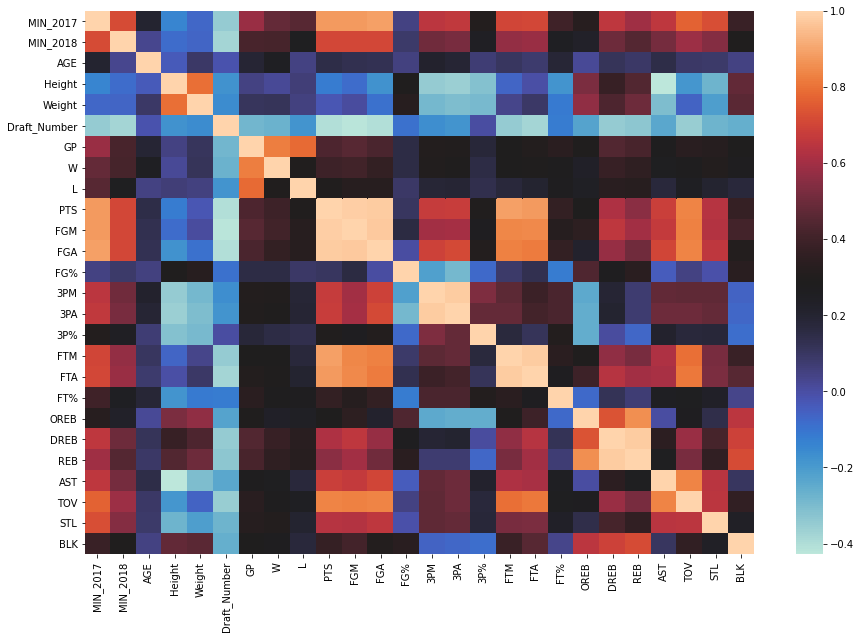

In [124]:
# Heatmap of Correlation Matrix

plt.figure(figsize=(15,10))

sns.heatmap(df_30_cols.corr(),cmap='icefire')

plt.show()

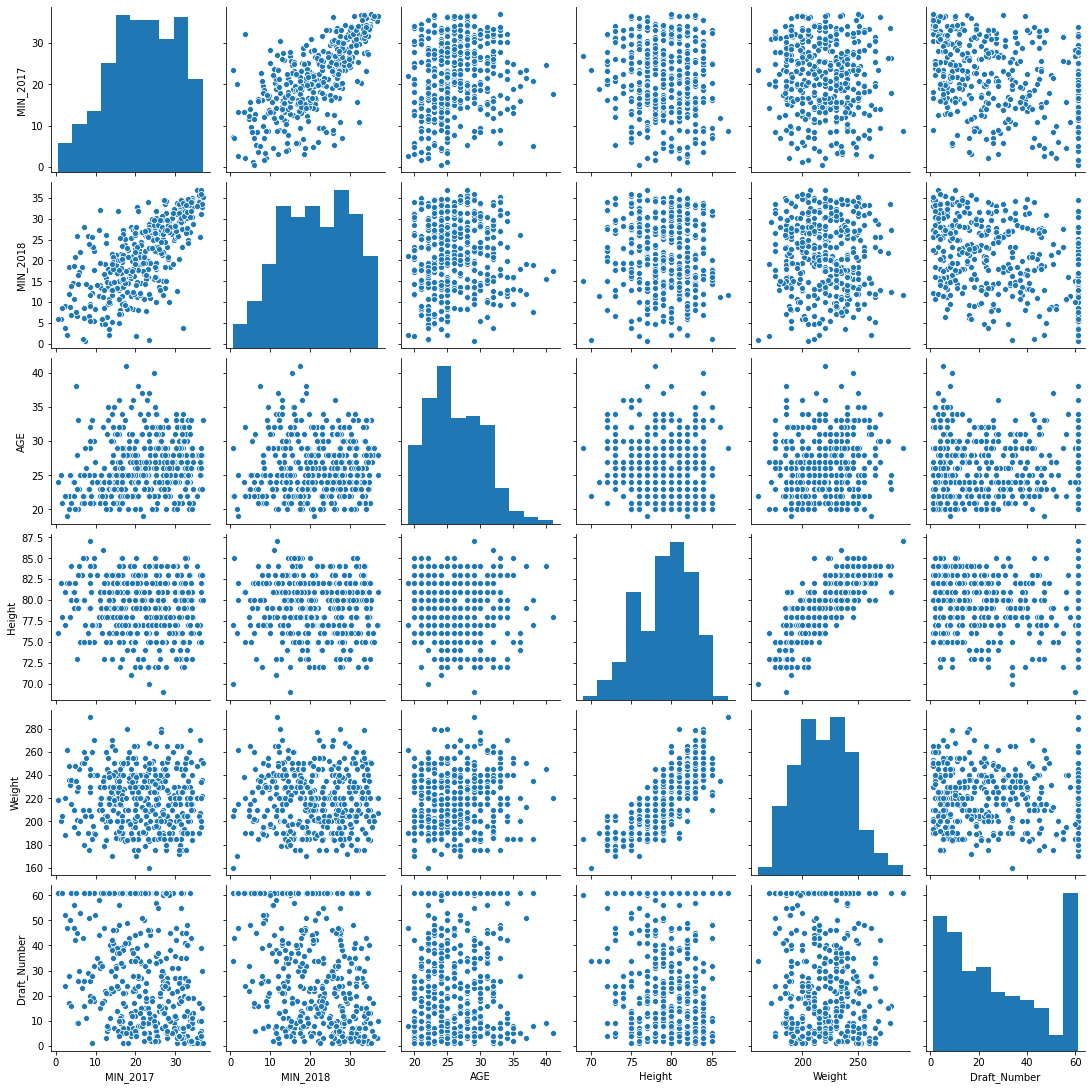

In [125]:
# Smaller subset of datarame for a scatter matrix

df_10_cols = df.iloc[:,:10]
sns.pairplot(df_10_cols)

In [126]:
# Commmented out because takes too long to load and looks messy visualizing the non_numeric variables.

#plt.figure(figsize=(3,2))

# sns.pairplot(df_10_cols, x_vars= 'MIN_2018', y_vars = df_10_cols.columns)

In [135]:
# Examining correlation values with Minutes played in the 2018 season.

corr_MIN_2018 = df.corr().MIN_2018
corr_MIN_2018  = np.abs(corr_MIN_2018).sort_values(ascending = False)
corr_MIN_2018[:40]

MIN_2018                    1.000000
MIN_2017                    0.715573
FGM                         0.708756
FGA                         0.708201
PTS                         0.707332
FP                          0.706304
OPP_FGA_5_9ft               0.701590
OPP_FGA_und_5ft             0.699945
OPP_FGM_und_5ft             0.689433
OPP_FGA_10_14ft             0.678199
OPP_FGA_25_29ft             0.674935
OPP_FGM_25_29ft             0.673781
OPP_FGM_5_9ft               0.670435
OPP_FGA_15_19ft             0.666317
Loose_BallsRecovered        0.659453
OPP_FGA_20_24ft             0.655659
OPP_FGM_10_14ft             0.636372
OPP_FGM_20_24ft             0.625868
OPP_FGM_15_19ft             0.609387
DEF_Loose_BallsRecovered    0.607918
PassesReceived              0.598337
PassesMade                  0.591319
TOV                         0.589995
Contested3PT_Shots          0.587378
FTA                         0.586031
FTM                         0.575549
Deflections                 0.571732
O

In [137]:
corr_MIN_2018[40:80]

DREB                          0.501951
FGM_20_24ft                   0.501036
ContestedShots                0.486233
REBChances                    0.486204
FGM_15_19ft                   0.481348
FGA_15_19ft                   0.481299
FGM_25_29ft                   0.472095
FGA_10_14ft                   0.466403
DeferredREB_Chances           0.465093
FGA_5_9ft                     0.453111
REB                           0.449098
PF                            0.437937
GP                            0.423375
W                             0.417007
FGM_5_9ft                     0.416662
FGM_10_14ft                   0.394216
USG%                          0.393811
DD2                           0.391165
Draft_Number                  0.377284
AST_ToPass%_Adj               0.359102
Contested2PT_Shots            0.339884
AST_ToPass%                   0.338636
AST%                          0.311801
PIE                           0.310051
BLK                           0.293848
+/-                      

In [138]:
corr_MIN_2018[80:]

TS%                           0.155334
DEF_Box_Outs                  0.154207
NETRTG                        0.151640
FG%_und_5ft                   0.150985
PACE                          0.149899
Box_Outs                      0.143391
AVG_REBDistance               0.142834
Player_RebOn_Box_Outs         0.141337
eFG%                          0.121802
OREB%                         0.120709
OPP_FG%_20_24ft               0.118334
%_Player_RebWhen_Box_Out      0.107483
ScreenAssists_PTS             0.092476
ScreenAssists                 0.088759
FG%                           0.087466
OFF_Box_Outs                  0.087048
Height                        0.082527
OPP_FG%_15_19ft               0.070022
ContestedREB%                 0.065806
Weight                        0.064472
REB%                          0.061155
FG%_10_14ft                   0.057921
DREB%                         0.036624
AGE                           0.032202
OPP_FG%_10_14ft               0.017840
OPP_FG%_und_5ft          

__Examining our Target Feature in comparison to the year before: MIN_2018.__

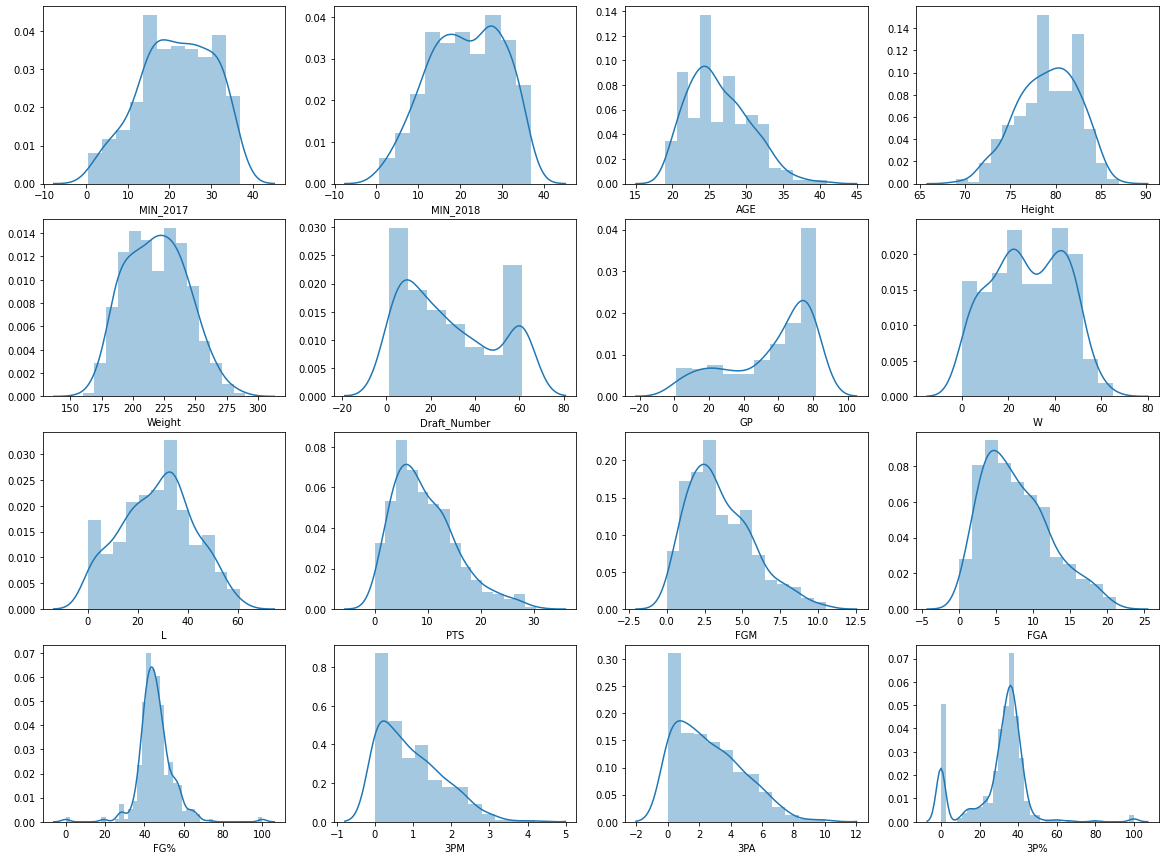

In [129]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(15,6))

# sns.distplot(df.MIN_2018,ax=ax1)
# sns.distplot(df.MIN_2017, ax=ax2)
# plt.show()

plt.figure(figsize=(20,15))

for i in range(16):
    plt.subplot(4,4,i+1)
    sns.distplot(df.iloc[:,i+4])

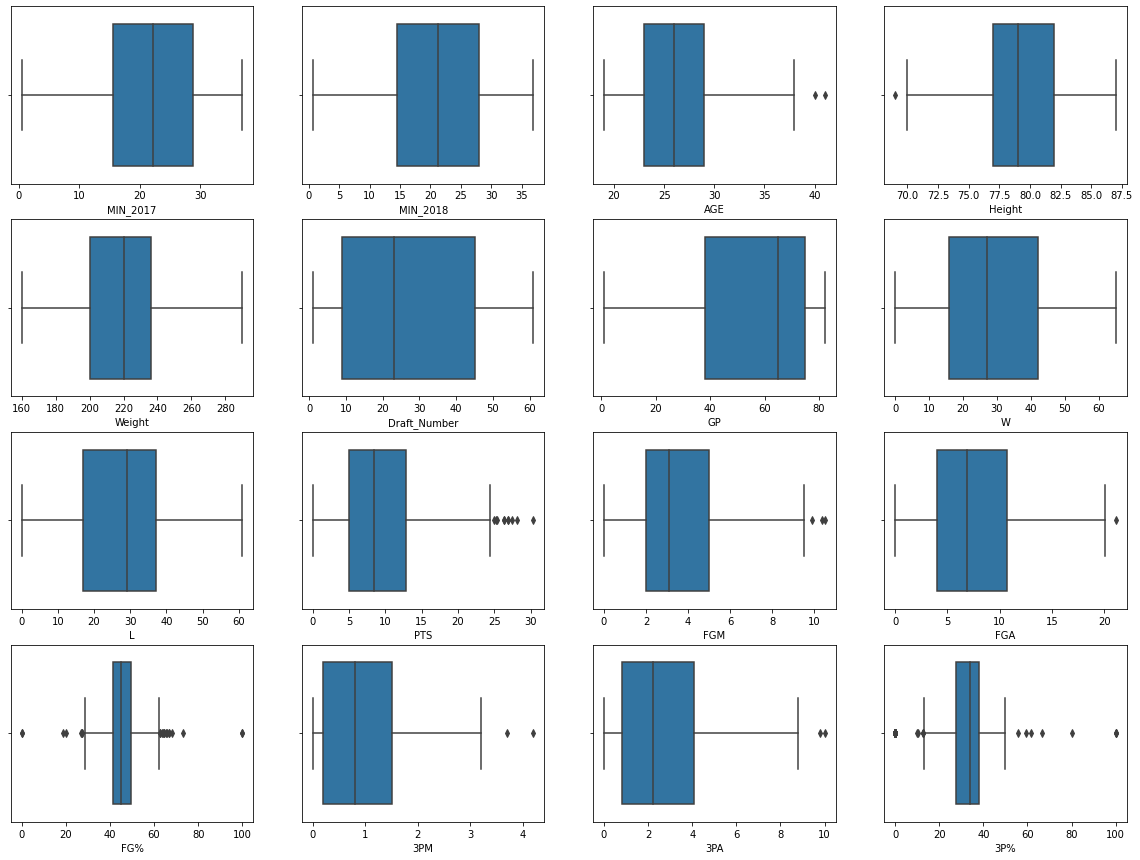

In [130]:
plt.figure(figsize=(20,15))

for i in range(16):
    plt.subplot(4,4,i+1)
    sns.boxplot(df.iloc[:,i+4])

In [101]:
# List of Colleges attended by players (why did I do this?)

df.iloc[:,2]

0                Arizona
1             Iowa State
2                Florida
3            Wake Forest
4      Cal-Santa Barbara
             ...        
404              Indiana
405              Gonzaga
406                 UCLA
407                 None
408                 None
Name: College, Length: 409, dtype: object

In [139]:
df.head()

,Player,TEAM,College,Country,MIN_2017,MIN_2018,AGE,Height,Weight,Draft_Number,GP,W,L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Box_Outs,OFF_Box_Outs,DEF_Box_Outs,Team_RebOn_Box_Outs,Player_RebOn_Box_Outs,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB,ContestedREB%,REBChances,REBChance%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,PotentialAST,AST_PTS_Created,ASTAdj,AST_ToPass%,AST_ToPass%_Adj,ScreenAssists,ScreenAssists_PTS,Deflections,OFF_Loose_BallsRecovered,DEF_Loose_BallsRecovered,Loose_BallsRecovered,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,ContestedShots,FGM_und_5ft,FGA_und_5ft,FG%_und_5ft,FGM_5_9ft,FGA_5_9ft,FG%_5_9ft,FGM_10_14ft,FGA_10_14ft,FG%_10_14ft,FGM_15_19ft,FGA_15_19ft,FG%_15_19ft,FGM_20_24ft,FGA_20_24ft,FG%_20_24ft,FGM_25_29ft,FGA_25_29ft,FG%_25_29ft,OPP_FGM_und_5ft,OPP_FGA_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FGA_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FGA_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FGA_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FGA_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FGA_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,REB%,eFG%,TS%,USG%,PACE,PIE
0,Aaron Gordon,ORL,Arizona,USA,32.9,33.8,22,81.0,220,4,58,19,39,17.6,6.5,14.9,43.4,2.0,5.9,33.6,2.7,3.9,69.8,1.5,6.4,7.9,2.3,1.8,1.0,0.8,1.9,34.1,17,0,-1.6,2.7,0.2,2.5,1.3,0.4,7.0,93.0,85.2,23.9,2.6,33.5,13.6,58.1,0.7,61.1,6.0,40.2,32.5,0.2,4.6,5.6,2.7,5.8,6.6,0.9,1.9,1.4,0.5,0.7,1.2,42.9,57.1,0.07,4.7,1.8,6.5,3.2,4.9,66.7,0.2,0.9,20.0,0.4,1.2,35.7,0.5,1.8,29.8,0.7,2.1,35.3,1.4,4.1,33.5,14.4,22.8,63.2,2.3,6.1,37.1,2.2,5.1,42.4,2.5,5.9,42.4,3.7,9.3,40.3,3.8,11.1,33.9,108.3,-2.0,11.1,4.4,19.1,11.6,50.0,53.0,23.8,100.43,11.3
1,Abdel Nader,BOS,Iowa State,Egypt,10.9,11.4,24,78.0,230,58,48,33,15,3.0,1.0,3.1,33.6,0.5,1.4,35.4,0.5,0.8,59.0,0.3,1.2,1.5,0.5,0.7,0.3,0.2,0.9,6.5,0,0,-2.3,0.8,0.1,0.7,0.5,0.1,17.5,82.5,92.0,12.0,0.4,29.6,2.6,57.7,0.2,62.3,7.0,8.7,9.1,0.1,1.3,1.5,0.7,6.4,8.6,0.1,0.3,0.7,0.1,0.2,0.4,38.9,61.1,0.00,1.5,1.3,2.8,0.4,1.1,40.4,0.1,0.5,20.0,0.0,0.1,20.0,0.0,0.1,0.0,0.3,0.7,38.7,0.3,0.8,32.4,4.2,7.1,59.8,0.5,1.9,26.8,0.6,1.5,41.9,0.8,1.9,42.2,1.3,3.0,43.1,1.7,4.2,39.8,107.3,-10.3,7.8,2.4,11.1,6.7,41.3,43.9,16.2,100.46,3.3
2,Al Horford,BOS,Florida,Dominican Rep...,31.6,29.0,32,82.0,245,3,72,47,25,12.9,5.1,10.5,48.9,1.3,3.1,42.9,1.3,1.7,78.3,1.4,5.9,7.4,4.7,1.8,0.6,1.1,1.9,32.0,15,0,4.8,6.8,0.5,6.3,3.5,1.3,7.3,92.7,90.4,33.3,2.5,33.9,12.7,57.8,0.6,60.6,6.4,48.9,42.9,0.3,8.0,11.7,5.1,9.5,10.4,2.7,6.5,1.3,0.4,0.4,0.8,52.6,47.4,0.00,8.8,3.5,12.3,1.9,2.9,67.5,0.8,1.9,40.7,0.5,1.4,37.3,0.4,0.9,49.2,0.5,1.2,39.5,1.0,2.2,44.1,11.5,19.2,59.8,1.8,5.4,33.9,1.8,4.9,36.0,2.4,6.6,35.7,3.4,8.3,41.2,3.5,11.8,29.8,101.6,7.3,22.5,4.7,17.8,11.5,55.3,57.5,18.3,97.23,13.4
3,Al-Farouq Aminu,POR,Wake Forest,USA,30.0,28.3,27,81.0,220,8,69,40,29,9.3,3.3,8.4,39.5,1.8,4.9,36.9,0.9,1.2,73.8,1.4,6.2,7.6,1.2,1.1,1.1,0.6,2.0,24.3,9,0,3.2,3.9,0.6,3.3,1.9,0.9,16.2,83.8,88.5,40.5,2.2,29.1,12.9,59.2,0.7,62.4,5.9,25.0,19.1,0.2,2.6,3.1,1.6,4.9,6.3,1.5,3.5,2.2,0.5,0.7,1.2,42.4,57.6,0.00,5.7,3.0,8.7,1.2,2.1,58.9,0.2,0.7,24.5,0.0,0.2,16.7,0.0,0.4,11.1,1.0,2.5,41.3,0.8,2.6,31.8,10.3,19.0,54.1,2.3,5.3,43.3,2.1,5.3,38.5,2.6,5.9,43.6,3.5,9.0,39.5,3.4,9.1,36.8,104.4,5.2,5.6,4.5,19.8,12.1,50.3,52.2,14.5,98.47,9.0
4,Alan Williams,PHX,Cal-Santa Barbara,USA,14.1,5.1,25,80.0,265,61,5,1,4,4.0,1.4,3.6,38.9,0.0,0.0,0.0,1.2,1.8,66.7,0.6,3.8,4.4,1.6,1.4,1.0,0.2,2.6,13.9,0,0,0.2,3.4,0.4,3.0,1.4,0.6,11.8,88.2,87.5,37.5,1.2,27.3,9.6,45.8,0.0,45.8,4.0,17.6,15.6,0.0,3.0,5.6,2.0,9.1,11.4,1.8,4.0,1.0,0.0,0.2,0.2,0.0,100.0,0.00,1.2,1.0,2.2,0.8,1.4,57.1,0.6,1.6,37.5,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,9.4,44.7,1.0,2.2,45.5,0.8,1.6,50.0,0.8,2.2,36.4,1.2,2.2,54.5,1.4,5.2,26.9,90.8,0.1,19.5,3.9,26.0,14.8,38.9,45.5,18.4,97.25,8.9


## Feauture Engineering 

In [ ]:
# Mean Normalization (StandardScaler with sklearn?)
# Convert some stats to per minute played?
# Reconsider turning everything into percentages

In [ ]:
# Watch for Colinearity with Dummy Variables (make sure one is not hot?)